In [1]:
def exp(b, n):
    if n == 0:
        return 1
    else:
        return b * exp(b, n-1)
def exp_fast(b, n):
    if n == 0:
        return 1
    elif n % 2 == 0:
        return square(exp_fast(b, n//2))
    else:
        return b * exp_fast(b, n-1)

def square(x):
    return x * x


In [2]:
%%time
exp(2, 400)

CPU times: user 0 ns, sys: 344 μs, total: 344 μs
Wall time: 354 μs


2582249878086908589655919172003011874329705792829223512830659356540647622016841194629645353280137831435903171972747493376

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from timeit import timeit, repeat
from numpy import median, percentile

plt.style.use('ggplot')
plt.rc('font', size=16)

def plot_times(name, xs, n=15):

    f = lambda x: name + '(' + str(x) + ')'
    g = globals()

    samples = []
    times = lambda x: repeat(f(x), globals=g, number=1,repeat = n)
    samples.append([median(times(x)) for x in xs])

    ys = [10e3 * median(sample) for sample in zip(*samples)]

    plt.figure(figsize=(8, 8))
    plt.plot(xs, ys)
    plt.xlabel('n')
    plt.ylabel('milliseconds')

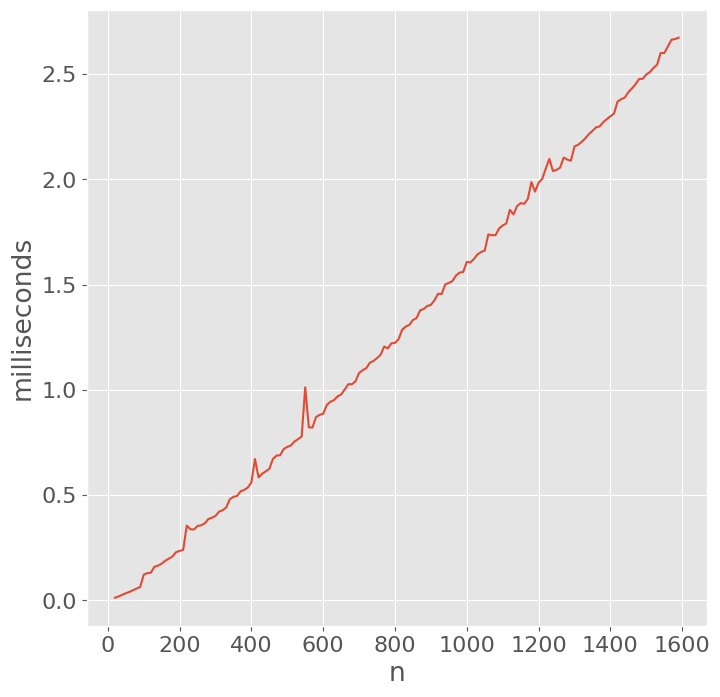

In [4]:
exp_2 = lambda n: exp(2, n)
plot_times('exp_2', range(20,1600,10))

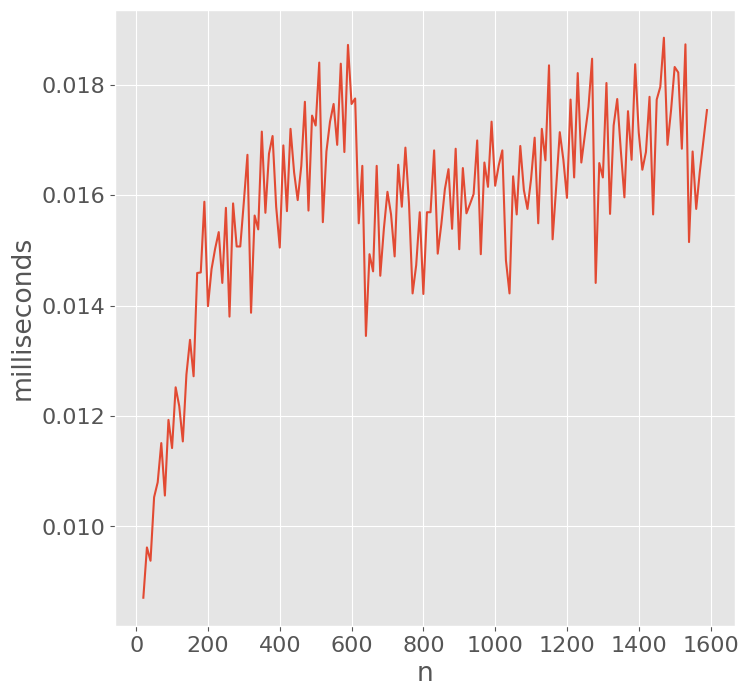

In [5]:
exp_2_fast = lambda n: exp_fast(2.0, n)
plot_times('exp_2_fast', range(20, 1600, 10))

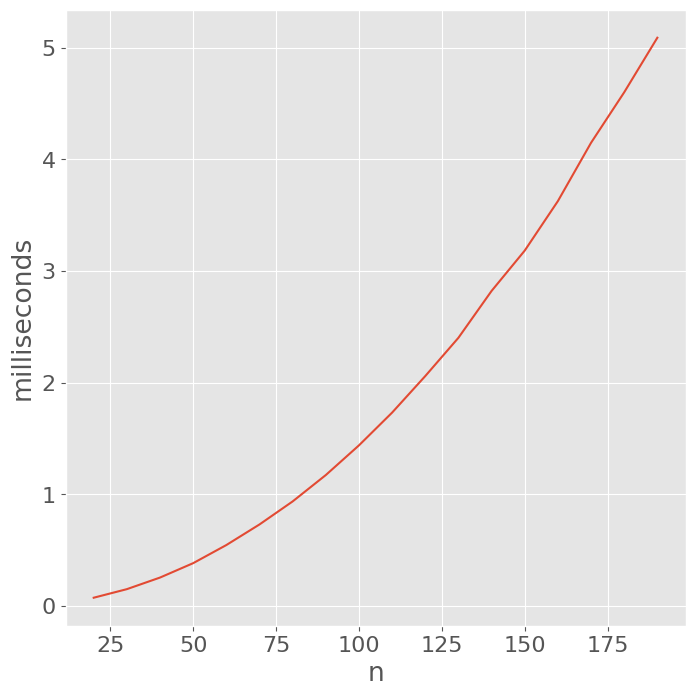

In [6]:
def overlap(a,b):
    count = 0
    for item in a:
        for other in b:
            if item == other:
                count += 1
    return count

overlap_ranges = lambda n: overlap(list(range(n)), list(range(n)))
plot_times('overlap_ranges', range(20, 200, 10))